Other Resources

Link : https://www.youtube.com/watch?v=sGAT2npnNLc&list=PL3DBHamkNmfeE_YUHc13N-o0P-0bZ3NqU&index=6

Link2 : https://www.python-course.eu/graphs_python.php

## Basics of NetworkX API, using Twitter network
To get you up and running with the NetworkX API, we will run through some basic functions that let you query a Twitter network that has been pre-loaded for you and is available in the IPython Shell as T. The Twitter network comes from KONECT, and shows a snapshot of a subset of Twitter users. It is an anonymized Twitter network with metadata.

You're now going to use the NetworkX API to explore some basic properties of the network, and are encouraged to experiment with the data in the IPython Shell.

Wait for the IPython shell to indicate that the graph that has been preloaded under the variable name T (representing a Twitter network), and then answer the following question:

What is 
- the size of the graph T, the type of T.nodes(), 
- and the data structure of the third element of the last edge listed in T.edges(data=True)? 

The len() and type() functions will be useful here. To access the last entry of T.edges(data=True), you can use list(T.edges(data=True))[-1].

In [1]:
import networkx as nx

In [2]:
T = nx.read_gpickle("C:\\Users\\asus\\Downloads\\DataCamp\\Introduction to Network Analysis\\ego-twitter.p")

In [3]:
list(T.edges(data = True))[-1]

(23324, 23336, {'date': datetime.date(2010, 9, 20)})

In [4]:
print(len(T))
print(type(T.nodes()))
print(list(T.edges(data=True))[-1])
print(list(T.edges(data=True))[-1][2])

23369
<class 'networkx.classes.reportviews.NodeView'>
(23324, 23336, {'date': datetime.date(2010, 9, 20)})
{'date': datetime.date(2010, 9, 20)}


### Basic drawing of a network using NetworkX
NetworkX provides some basic drawing functionality that works for small graphs. We have selected a subset of nodes from the graph for you to practice using NetworkX's drawing facilities. It has been pre-loaded as T_sub.

Instructions
100 XP
Import matplotlib.pyplot as plt and networkx as nx.
Draw T_sub to the screen by using the nx.draw() function, and don't forget to also use plt.show() to display it.

In [5]:
# # Import necessary modules
# import matplotlib.pyplot as plt
# import networkx as nx

# # Draw the graph to screen
# nx.draw(T)
# plt.show()

## Quick Intro : First Graph

In [6]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Making  graph object
G = nx.Graph()

# Adding 3 nodes to the graph
G.add_nodes_from([1,2,3])

# Showing the number fo nodes in the graph
G.nodes()

NodeView((1, 2, 3))

In [7]:
## Adding edges between two nodes of the graph
G.add_edge(1,2)
##Checking the edges between
G.edges()

EdgeView([(1, 2)])

In [8]:
##Adding metadata to the nodes
G.nodes[1]['label'] = 'blue'

##SHowing all the data corresponding to the nodes
G.nodes(data = True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

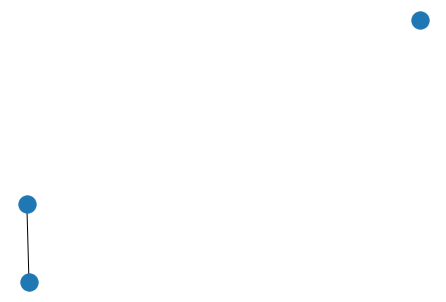

In [9]:
# Draw the graph to screen
nx.draw(G)
plt.show()

Great work! Next, you'll learn how to perform basic queries on a graph.

### Queries on a graph
Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for "nodes of interest" and "edges of interest". To achieve this, you'll make use of the .nodes() and .edges() methods that Eric went over in the video. The .nodes() method returns a list of nodes, while the .edges() method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. For a refresher on list comprehensions, refer to Part 2 of DataCamp's Python Data Science Toolbox course. Here's the recipe for a list comprehension:

[ output expression for iterator variable in iterable if predicate expression ].

You have to fill in the _iterable_ and the _predicate expression_. Feel free to prototype your answer by exploring the graph in the IPython Shell before submitting your solution.

Instructions

- Use a list comprehension to get a list of nodes from the graph T that have the 'occupation' label of 'scientist'.

- The output expression n has been specified for you, along with the iterator variables n and d. - - 

- Your task is to fill in the iterable and the conditional expression.

- Use the .nodes() method of T access its nodes, and be sure to specify data=True to obtain the metadata for the nodes.

- The iterator variable d is a dictionary. The key of interest here is 'occupation' and value of interest is 'scientist'.

- Use a list comprehension to get a list of edges from the graph T that were formed for at least 6 years, i.e., from before 1 Jan 2010.

- Your task once again is to fill in the iterable and conditional expression.

- Use the .edges() method of T to access its edges. Be sure to obtain the metadata for the edges as well.

- The dates are stored as datetime.date objects in the metadata dictionary d, under the key 'date'. To access the date 1 Jan 2009, for example, the dictionary value would be date(2009, 1, 1).


In [10]:
import datetime

You'll write list comprehensions to effectively build these queries in one line. For a refresher on list comprehensions, refer to Part 2 of DataCamp's Python Data Science Toolbox course. Here's the recipe for a list comprehension:

    output expression **for** iterator variable **in** iterable **if** predicate expression

In [11]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < datetime.date(2010, 1, 1)]

## Types of Graphs

1. Undirected Graphs

Example Facebook, because you become friends on the same day
However, if we add the aspect of who sent the request first then we can probably state that the graph is directional

2. Directed Graphs

    
Example : Twitter Data is typically directed, i.e. who follows whom

3. Multi(Di) Graphs

Examples : Bike trip data, multiple bike trips from one-station to another

    - Weights on Graphs
    
    We can add the three a edges to make a new edge of value 3 in this case

    - Self Loops
    
    Example of a trip starting and ending at the same point may be refered to as self-loops

### Specifying a weight on edges
Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the 'weight' key in the metadata dictionary.

Before attempting the exercise, use the IPython Shell to access the dictionary metadata of T and explore it, for instance by running the commands T.edges[1, 10] and then T.edges[10, 1]. Note how there's only one field, and now you're going to add another field, called 'weight'.

Instructions
100 XP
Set the 'weight' attribute of the edge between node 1 and 10 of T to be equal to 2. Refer to the following template to set an attribute of an edge: network_name.edges[node1, node2]['attribute'] = value. Here, the 'attribute' is 'weight'.
Set the weight of every edge involving node 293 to be equal to 1.1. To do this:
Using a for loop, iterate over all the edges of T, including the metadata.
If 293 is involved in the list of nodes [u, v]:
Set the weight of the edge between u and v to be 1.1.


In [12]:
# Set the weight of the edge
weight = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data = True):

    # Check if node 293 is involved
    if 293 in [u,v]:

        # Set the weight to 1.1
        T.edges[u,v]['weight'] = 1.1

Excellent job! Being able to iterate over graphs like this to explore and alter their metadata is an important skill.

### Checking whether there are self-loops in the graph
As Eric discussed, NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: .number_of_selfloops().

In this exercise as well as later ones, you'll find the assert statement useful. An assert-ions checks whether the statement placed after it evaluates to True, otherwise it will throw an AssertionError.

To begin, use the .number_of_selfloops() method on T in the IPython Shell to get the number of edges that begin and end on the same node. A number of self-loops have been synthetically added to the graph. Your job in this exercise is to write a function that returns these edges.

Instructions
100 XP
- Define a function called find_selfloop_nodes() which takes one argument: G.
- Using a for loop, iterate over all the edges in G (excluding the metadata).
- If node u is equal to node v:
- Append u to the list nodes_in_selfloops.
- Return the list nodes_in_selfloops.
- Check that the number of self loops in the graph equals the number of nodes in self loops. This has been done for you, so hit 'Submit Answer' to see the result!

In [13]:
nx.number_of_selfloops(T)

42

In [14]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

        # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert nx.number_of_selfloops(T) == len(find_selfloop_nodes(T))

In [15]:
print(len(find_selfloop_nodes(T)))

42


## Visualizing Networks

### 1. Matrix Plot

### 1.A. Matrix Plots Directed

### 1.B. Matrix Plots 

### 2. Arc Plots

### 3. Circos Plots

### Visualizing using Matrix plots
It is time to try your first "fancy" graph visualization method: a matrix plot. To do this, nxviz provides a MatrixPlot object.

nxviz is a package for visualizing graphs in a rational fashion. Under the hood, the MatrixPlot utilizes nx.to_numpy_matrix(G), which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost, as you'll verify using an assert statement.

A corresponding nx.from_numpy_matrix(A) allows one to quickly create a graph from a NumPy matrix. The default graph type is Graph(); if you want to make it a DiGraph(), that has to be specified using the create_using keyword argument, e.g. (nx.from_numpy_matrix(A, create_using=nx.DiGraph)).

One final note, matplotlib.pyplot and networkx have already been imported as plt and nx, respectively, and the graph T has been pre-loaded. For simplicity and speed, we have sub-sampled only 100 edges from the network.

Import nxviz as nv.
Plot the graph T as a matrix plot. To do this:
Create the MatrixPlot object called m using the nv.MatrixPlot() function with T passed in as an argument.
Draw the m to the screen using the .draw() method.
Display the plot using plt.show().
Convert the graph to a matrix format, and then convert the graph to back to the NetworkX form from the matrix as a directed graph. This has been done for you.
Check that the category metadata field is lost from each node. This has also been done for you, so hit 'Submit Answer' to see the results!

In [16]:
# # Import nxviz
# import nxviz as nv

# # Create the MatrixPlot object: m
# m = nv.MatrixPlot(T)

# # Draw m to the screen
# m.draw()

# # Display the plot
# plt.show()

# # Convert T to a matrix format: A
# A = nx.to_numpy_matrix(T)

# # Convert A back to the NetworkX form as a directed graph: T_conv
# T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# # Check that the `category` metadata field is lost from each node
# for n, d in T_conv.nodes(data=True):
#     assert 'category' not in d.keys()

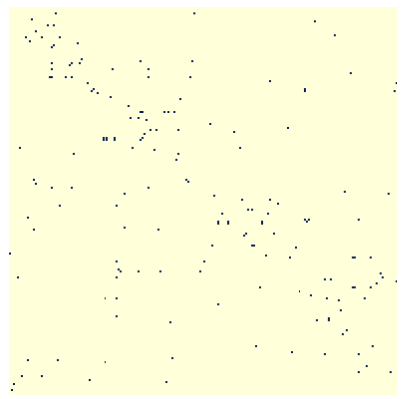

### Visualizing using Circos plots
Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

In this exercise, you'll continue getting practice with the nxviz API, this time with the CircosPlot object. matplotlib.pyplot has been imported for you as plt.

Instructions
100 XP

- Import CircosPlot from nxviz.

- Plot the Twitter network T as a Circos plot without any styling. Use the CircosPlot() function to do this. Don't forget to draw it to the screen using .draw() and then display it using plt.show().

In [17]:
# # Import necessary modules
# import matplotlib.pyplot as plt 
# from nxviz import CircosPlot 

# # Create the CircosPlot object: c
# c = CircosPlot(T)

# # Draw c to the screen
# c.draw()

# # Display the plot
# plt.show()

 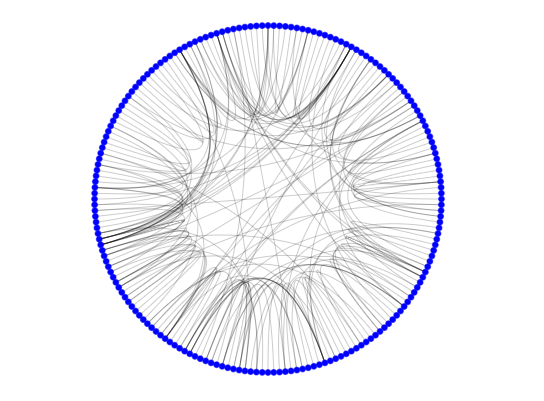

Fantastic! In the Chapter 4 Case Study, you'll learn how to customize CircosPlots to make them more informative.

#### Visualizing using Arc plots
Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. Two keyword arguments that you will try here are node_order='keyX' and node_color='keyX', in which you specify a key in the node metadata dictionary to color and order the nodes by.

matplotlib.pyplot has been imported for you as plt.

Instructions
100 XP
Import ArcPlot from nxviz.
Create an un-customized ArcPlot of T. To do this, use the ArcPlot() function with just T as the argument.
Create another ArcPlot of T in which the nodes are ordered and colored by the 'category' keyword. You'll have to specify the node_order and node_color parameters to do this. For both plots, be sure to draw them to the screen and display them with plt.show().

In [18]:
# # Import necessary modules
# import matplotlib.pyplot as plt
# from nxviz import ArcPlot

# # Create the un-customized ArcPlot object: a
# a = ArcPlot(T)

# # Draw a to the screen
# a.draw()

# # Display the plot
# plt.show()

# # Create the customized ArcPlot object: a2
# a2 = ArcPlot(T,node_order = 'category', node_color = 'category' )

# # Draw a2 to the screen
# a2.draw()

# # Display the plot
# plt.show()

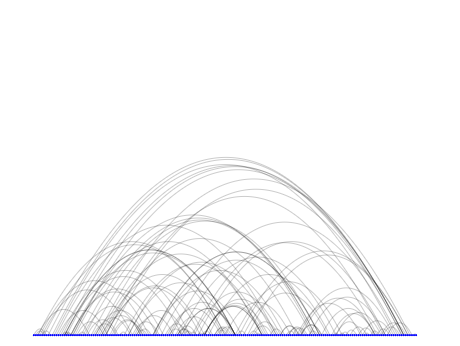

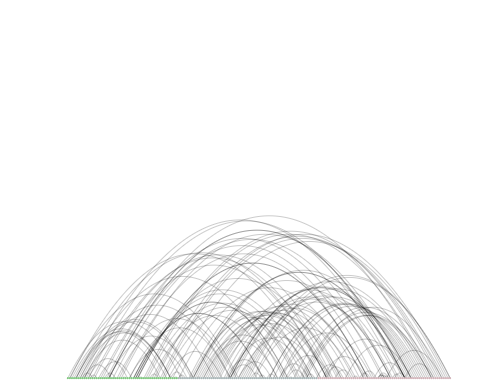

Excellent job! Notice the node coloring in the customized ArcPlot compared to the uncustomized version. In the customized ArcPlot, the nodes in each of the categories - 'I', 'D', and 'P' - have their own color. If it's difficult to see on your screen, you can expand the plot into a new window by clicking on the pop-out icon on the top-left next to 'Plots'.

# Chapter 2 : Important Nodes

## Degree of Centrality

    The degree centrality metric is one of many metrics we can use to evaluate the importance of a node, and is simply defined as the number of neighbors that a node has divided by the total number of neighbors that the node could possibly have.
    
   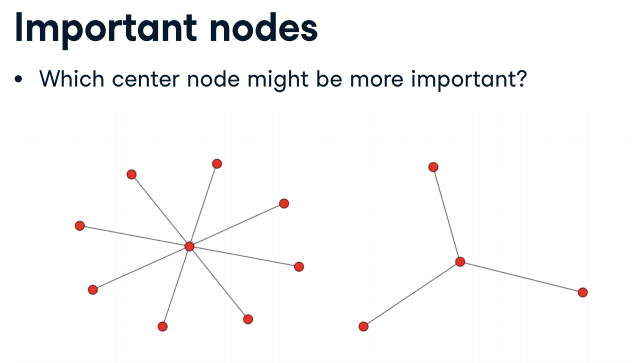
    
    
    
    

## Definition

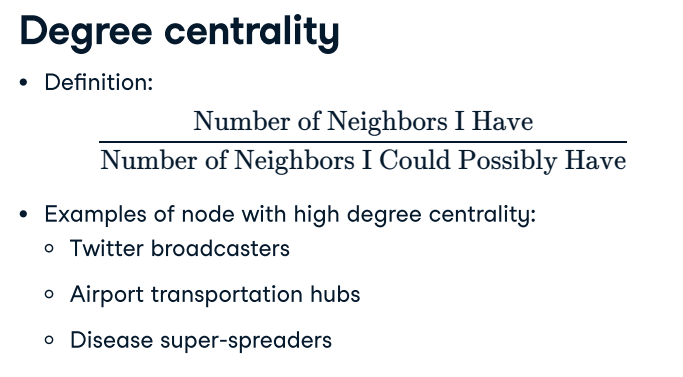

    There are two scenarios possible here: 
    **1. If self-loops are allowed,** 
    such as in a network mapping of all bike trips in a bike sharing system, then the number of neighbors that I could possibly have is every single node in the graph, including myself. 
    **2. On the other hand, if self-loops are not allowed, **
    such as in the Twitter social network where, by definition, my account cannot follow itself, then the number of neighbors I could possibly have is every other node in the graph, excluding myself

### Degree centrality

The degree_centrality function, which takes in a graph object as an argument, and returns a dictionary in which the key is the node and the value is the degree centrality score for that node. With the degree centrality function, self-loops are not considered.

G.

### Neighbors Function

### Compute number of neighbors for each node
How do you evaluate whether a node is an important one or not? There are a few ways to do so, and here, you're going to look at one metric: the number of neighbors that a node has.

Every NetworkX graph G exposes a .neighbors(n) method that returns a list of nodes that are the neighbors of the node n. To begin, use this method in the IPython Shell on the Twitter network T to get the neighbors of of node 1. This will get you familiar with how the function works. Then, your job in this exercise is to write a function that returns all nodes that have m neighbors.

Instructions
0 XP
Write a function called nodes_with_m_nbrs() that has two parameters - G and m - and returns all nodes that have m neighbors. To do this:
Iterate over all nodes in G (not including the metadata).
Use the len() and list() functions together with the .neighbors() method to calculate the total number of neighbors that node n in graph G has.
If the number of neighbors of node n is equal to m, add n to the set nodes using the .add() method.
After iterating over all the nodes in G, return the set nodes.
Use your nodes_with_m_nbrs() function to retrieve all the nodes that have 6 neighbors in the graph T.

In [19]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(len(list(six_nbrs)))

25


Great work! The number of neighbors a node has is one way to identify important nodes. It looks like 25 nodes in graph T have 6 neighbors.

### Compute degree distribution
The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph. In this exercise, your job is to compute the degree distribution across T.

Instructions
100 XP
Use a list comprehension along with the .neighbors(n) method to get the degree of every node. The result should be a list of integers.
Use n as your iterator variable.
The output expression of your list comprehension should be the number of neighbors that node n has - that is, its degree. Use the len() and list() functions together with the .neighbors() method to compute this.
The iterable in your list comprehension is all the nodes in T, accessed using the .nodes() method.

In [20]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]


# Print the degrees
print(degrees)

[47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 10, 27, 0, 0, 0, 0, 0, 0, 0, 0, 34, 0, 0, 0, 0, 0, 60, 0, 11, 4, 0, 12, 0, 0, 56, 53, 0, 30, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 6, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 39, 8, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 26, 0, 5, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 7, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5

Excellent job! In the next exercise, you're going to visualize this degree distribution as well as the degree centrality distribution

### Degree centrality distribution
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

The nx.degree_centrality(G) function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

The degree distribution degrees you computed in the previous exercise using the list comprehension has been pre-loaded.

Instructions
100 XP
Compute the degree centrality of the Twitter network T.
Using plt.hist(), plot a histogram of the degree centrality distribution of T. This can be accessed using list(deg_cent.values()).
Plot a histogram of the degree distribution degrees of T. This is the same list you computed in the last exercise.
Create a scatter plot with degrees on the x-axis and the degree centrality distribution list(deg_cent.values()) on the y-axis.

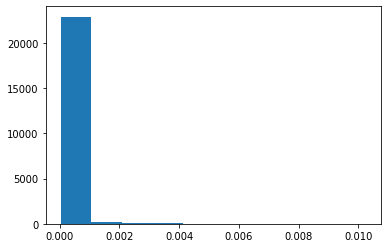

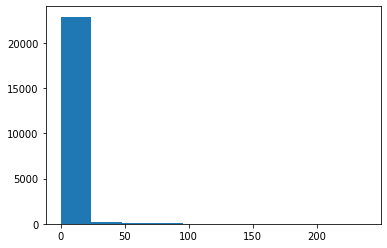

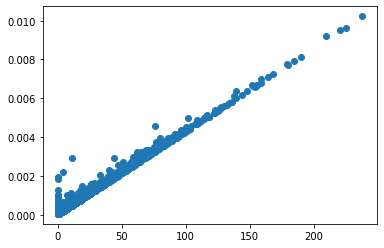

In [21]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

Great work! Click the 'Next Plot' and 'Previous Plot' buttons to cycle through your 3 plots. Given the similarities of their histograms, it should not surprise you to see a perfect correlation between the centrality distribution and the degree distribution.

## Path Findings

3. Breadth-first search (BFS)
The breadth-first search algorithm was first developed in the 1950s as a way of finding the shortest path out of a maze. How does this algorithm work? Suppose we have the network above, comprised of 11 nodes, and we want to find the shortest path between the yellow and red nodes. The algorithm essentially works as such. If we start at the yellow node, we first ask for the yellow node's neighbors. We then ask

4. Breadth-first search (BFS)
if the destination node is present in the set of yellow node's neighbors. If not, we continue on. Going out a second degree of separation,

5. Breadth-first search (BFS)
we ask for the neighbors of our neighbors. The destination node is still not present, so we continue on.

6. Breadth-first search (BFS)
On our 3rd degree of separation out, we see that the destination node is present. At this point, we can stop and ignore the next degree of separation. Note that there was one other path possible, but it was longer. As such, with the breadth-first-search algorithm, we have achieved our goal of finding the "shortest" path between the pair of nodes. That is the breadth-first-search algorithm in its essence!

7. Recall: Neighbors
Let's quickly review some code that will help you with the following exercises. Say we have a graph G. As a good habit, let's check first for the number of nodes and edges present. Recall that we can do len(G-dot-edges) and len(G-dot-nodes), and see that there are 57 edges between 20 nodes. Let's see if we can find a path between nodes 1 and 19.

8. Recall: Neighbors
If we do G-dot-neighbors(1), we get back a list containing the nodes [10, 5, 14, 7] as the neighbors of 1. Let's go one degree out, to the first node in the list of node 1's neighbors, which is node 10. Now, let's check the neighbors of 10: note that we have 1, which is correct, and then 19, and then a whole slew of other nodes. Since 19, our destination node, is present in the neighbors of node 10, we can stop there. If 19 wasn't there, we would go on to check the neighbors of node 5, which was the next node in the list of node 1's neighbors.

### Shortest Path I
You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance; you'll see this in a later exercise.

In this set of 3 exercises, you're going to build up slowly to get to the final BFS algorithm. The problem has been broken into 3 parts that, if you complete in succession, will get you to a first pass implementation of the BFS algorithm.

Instructions
100 XP

- Create a function called path_exists() that has 3 parameters - G, node1, and node2 - and returns whether or not a path exists between the two nodes.

- Initialize the queue of nodes to visit with the first node, node1. queue should be a list.

- Iterate over the nodes in queue.

- Get the neighbors of the node using the .neighbors() method of the graph G.

- Check to see if the destination node node2 is in the set of neighbors. If it is, return True.

In [22]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

Great! In the next exercise, you'll extend this function by including the condition where the destination node is not present in the neighbors.

## Shortest Path II
Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

All the code you need to write is in the else condition; that is, if node2 is not in neighbors.

Instructions
100 XP
Using the .add() method, add the current node node to the set visited_nodes to keep track of what nodes have already been visited.
Add the neighbors of the current node node that have not yet been visited to queue. To do this, you'll need to use the .extend() method of queue together with a list comprehension. The .extend() method appends all the items in a given list.
The output expression and iterator variable of the list comprehension are both n. The iterable is the list neighbors, and the conditional is if n is not in the visited nodes.

## Shortest Path II
Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

All the code you need to write is in the else condition; that is, if node2 is not in neighbors.

Instructions
0 XP
Using the .add() method, add the current node node to the set visited_nodes to keep track of what nodes have already been visited.
Add the neighbors of the current node node that have not yet been visited to queue. To do this, you'll need to use the .extend() method of queue together with a list comprehension. The .extend() method appends all the items in a given list.
The output expression and iterator variable of the list comprehension are both n. The iterable is the list neighbors, and the conditional is if n is not in the visited nodes.

In [23]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True

        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

Excellent work, you're almost there! To complete the function, you have to write code for the condition in which there is no path between two nodes.

### Shortest Path III
This is the final exercise of this trio! You're now going to complete the problem by writing the code that returns False if there's no path between two nodes.

Instructions
100 XP
Check to see if the queue has been emptied. You can do this by inspecting the last element of queue with [-1].
Place the appropriate return statement for indicating whether there's a path between these two nodes.

In [24]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

Fantastic! You've just written an implementation of the BFS algorithm!

### Betweenness Centrality

#### NetworkX betweenness centrality on a social network
Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

NetworkX provides the nx.betweenness_centrality(G) function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

Instructions
100 XP
Compute the betweenness centrality bet_cen of the nodes in the graph T.
Compute the degree centrality deg_cen of the nodes in the graph T.
Compare betweenness centrality to degree centrality by creating a scatterplot of the two, with list(bet_cen.values()) on the x-axis and list(deg_cen.values()) on the y-axis.

In [25]:
# # Compute the betweenness centrality of T: bet_cen
# bet_cen = nx.betweenness_centrality(T)

# # Compute the degree centrality of T: deg_cen
# deg_cen = nx.degree_centrality(T)

# # Create a scatter plot of betweenness centrality and degree centrality
# plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# # Display the plot
# plt.show()

Excellent job! Now that you know how to compute different metrics for node importance, you're going to take a deep dive into the Twitter network.

### Deep dive - Twitter network
You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

NetworkX has been pre-imported for you as nx.

Instructions
100 XP
Write a function find_nodes_with_highest_deg_cent(G) that returns the node(s) with the highest degree centrality using the following steps:
Compute the degree centrality of G.
Compute the maximum degree centrality using the max() function on list(deg_cent.values()).
Iterate over the degree centrality dictionary, deg_cent.items().
If the degree centrality value v of the current node k is equal to max_dc, add it to the set of nodes.
Use your function to find the node(s) that has the highest degree centrality in T.
Write an assertion statement that checks that the node(s) is/are correctly identified. This has been done for you, so hit 'Submit Answer' to see the result!

In [26]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

{11824}


Great work! It looks like node 11824 has the highest degree centrality.

## Deep dive - Twitter network part II
Next, you're going to do an analogous deep dive on betweenness centrality! Just a few hints to help you along: remember that betweenness centrality is computed using nx.betweenness_centrality(G).

Instructions
100 XP
- Write a function find_node_with_highest_bet_cent(G) that returns the node(s) with the highest betweenness centrality.
- Compute the betweenness centrality of G.
- Compute the maximum betweenness centrality using the max() function on list(bet_cent.values()).
- Iterate over the degree centrality dictionary, bet_cent.items().
- If the degree centrality value v of the current node k is equal to max_bc, add it to the set of nodes.
- Use your function to find the node(s) that has the highest betweenness centrality in T.
- Write an assertion statement that you've got the right node. This has been done for you, so hit 'Submit Answer' to see the result!

In [27]:
# # Define find_node_with_highest_bet_cent()
# def find_node_with_highest_bet_cent(G):

#     # Compute betweenness centrality: bet_cent
#     bet_cent = nx.betweenness_centrality(G)

#     # Compute maximum betweenness centrality: max_bc
#     max_bc = max(list(bet_cent.values()))

#     nodes = set()

#     # Iterate over the betweenness centrality dictionary
#     for k, v in bet_cent.items():

#         # Check if the current value has the maximum betweenness centrality
#         if v == max_bc:

#             # Add the current node to the set of nodes
#             nodes.add(k)

#     return nodes

# # Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
# top_bc = find_node_with_highest_bet_cent(T)
# print(top_bc)

# # Write an assertion statement that checks that the node(s) is/are correctly identified.
# for node in top_bc:
#     assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())

Fantastic, you have correctly identified that node 1 has the highest betweenness centrality!

## Cliques

    A set of nodes that are completely connected by an edge to every other node in the set. It is, then, a completely connected graph.
    
   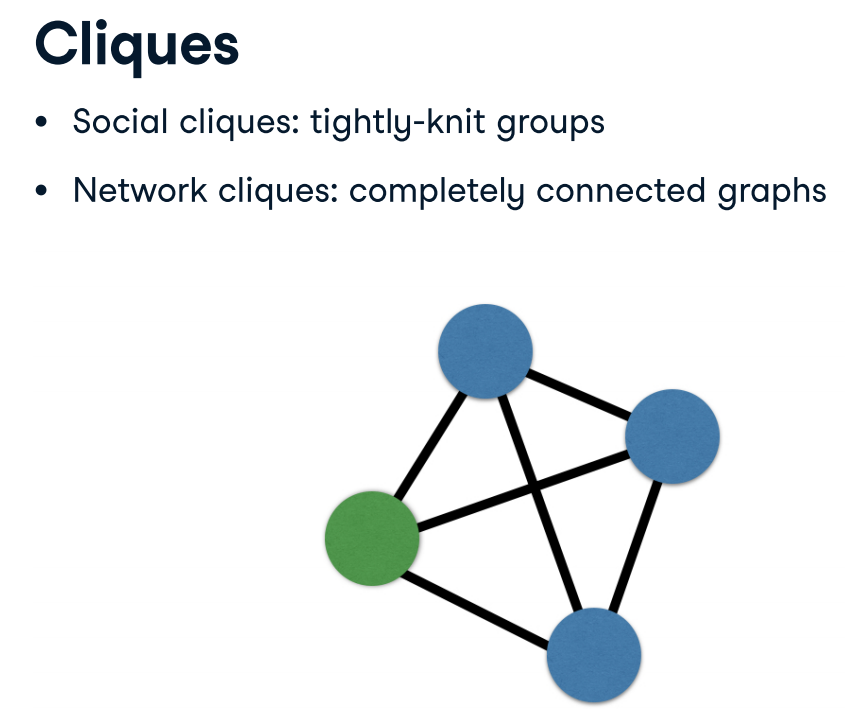

## Simplest Clique
    By the definition of a clique, an edge is the simplest clique possible
    
   

## Simplest Complex Clique
       '3 fully connected node'
   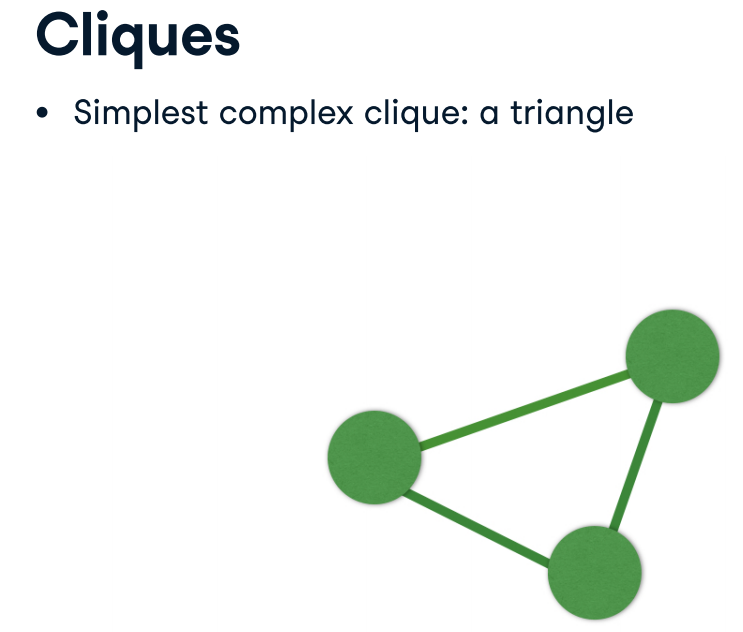

### Identifying triangle relationships
Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.

- Import combinations from itertools.
- Write a function is_in_triangle() that has two parameters - G and n - and checks whether a given node is in a triangle relationship or not combinations(iterable, n) returns combinations of size n from iterable. This will be useful here, as you want combinations of size 2 from G.neighbors(n).
- To check whether an edge exists between two nodes, use the .has_edge(node1, node2) method. If an edge exists, then the given node is in a triangle relationship, and you should return True.


In [28]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

Excellent! You're going to modify this function in the next exercise to extract all nodes involved in a triangle relationship with a given node.

### Finding nodes involved in triangles
NetworkX provides an API for counting the number of triangles that every node is involved in: nx.triangles(G). It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

Instructions
100 XP
- Write a function nodes_in_triangle() that has two parameters - G and n - and identifies all nodes in a triangle relationship with a given node.
- In the for loop, iterate over all possible triangle relationship combinations.
- Check whether the nodes n1 and n2 have an edge between them. If they do, add both nodes to the set triangle_nodes.
- Use your function in an assert statement to check that the number of nodes involved in a triangle relationship with node 1 of graph T is equal to 35.

In [29]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

In [30]:
# Write the assertion statement
assert (len(nodes_in_triangle(T, 1)) == 23)
# print(len(nodes_in_triangle(T, 1)))

### Finding open triangles
Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

Instructions
100 XP
- Write a function node_in_open_triangle() that has two parameters - G and n - and identifies whether a node is present in an open triangle with its neighbors.
- In the for loop, iterate over all possible triangle relationship combinations.
- If the nodes n1 and n2 do not have an edge between them, set in_open_triangle to True, break out from the if statement and return in_open_triangle.
- Use this function to count the number of open triangles that exist in T.
- In the for loop, iterate over all the nodes in T.
- If the current node n is in an open triangle, increment num_open_triangles.

In [31]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T,n)==True:

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

908


Excellent job! It looks like 22 nodes in graph T are in open triangles!

### Maximal CLiques

A clique that is no longer a clique when a new node is added to it

#### The three nodes in green are not an example of maxiaml cliques
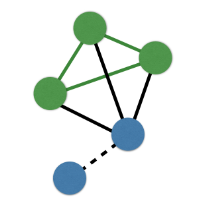

#### The 4 nodes here will form a maximal clique
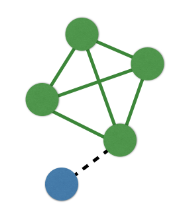

# Multiple Cliques ---> Community

<generator object find_cliques at 0x000001BC12985C80>


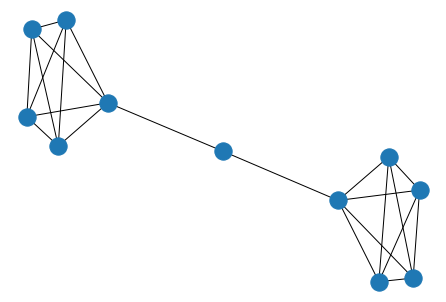

In [32]:
G = nx.barbell_graph(m1 = 5, m2 = 1)

print(nx.find_cliques(G)) 
##This has returned a list of generators instead of list of cliques

# Draw the graph to screen
nx.draw(G)
plt.show()

In [33]:
list(nx.find_cliques(G))
##There are two maximal cliques of  size 5
##There are two maximal cliques of  size 2, because edges are also a clique

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

### Finding all maximal cliques of size "n"
Now that you've explored triangles (and open triangles), let's move on to the concept of maximal cliques. Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: nx.find_cliques(G). Play around with the function by using it on T in the IPython Shell, and then try answering the exercise.

Instructions
100 XP
- Write a function maximal_cliques() that has two parameters - G and size - and finds all maximal cliques of size n.
- In the for loop, iterate over all the cliques in G using the nx.find_cliques() function.
- If the current clique is of size size, append it to the list mcs.
- Use an assert statement and your maximal_cliques() function to check that there are 33 maximal cliques of size 3 in the graph T.

## Note : T has to be a unidirected graph for this function to be implemented

In [34]:
# # Define maximal_cliques()
# def maximal_cliques(G, size):
#     """
#     Finds all maximal cliques in graph `G` that are of size `size`.
#     """
#     mcs = []
#     for clique in nx.find_cliques(G):
#         if len(clique) == size:
#             mcs.append(clique)
#     return mcs

# # Check that there are 33 maximal cliques of size 3 in the graph T
# # assert len(maximal_cliques(T, 3)) == 33

# # Check that there are 33 maximal cliques of size 3 in the graph T
# # assert len(maximal_cliques(T,3)) == 33
# maximal_cliques(T,3)

In [35]:
type(T)

networkx.classes.digraph.DiGraph

## Subgraphs
Visualized a part of the graph
1. Paths
2. COmmunities/Cliques
3. Degree of seperation from a node

#### Making a random node graph

In [36]:
G = nx.erdos_renyi_graph(n=20, p=0.2)
# n = number of nodes
# p = the probability that an edge exists between two graphs

G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [37]:
# Extract the neighbors of node 8

In [38]:
nodes = G.neighbors(8)
nodes

In [39]:
# nodes.append(G.node(8))

In [40]:
nodes
G_eight = G.subgraph(nodes)
G_eight.nodes()

print(type(G))
print(type(G_eight))

<class 'networkx.classes.graph.Graph'>
<class 'networkx.classes.graph.Graph'>


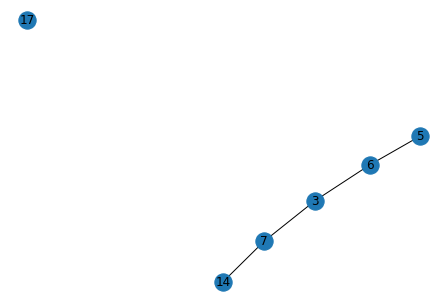

In [41]:
nx.draw(G_eight, with_labels = True)

### Subgraphs I
There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into another graph object using G.subgraph(nodes), which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

matplotlib.pyplot has been imported for you as plt.

Instructions
0 XP
- Write a function get_nodes_and_nbrs(G, nodes_of_interest) that extracts the subgraph from graph G comprised of the nodes_of_interest and their neighbors.
- In the first for loop, iterate over nodes_of_interest and append the current node n to nodes_to_draw.
- In the second for loop, iterate over the neighbors of n, and append all the neighbors nbr to nodes_to_draw.
- Use the function to extract the subgraph from T comprised of nodes 29, 38, and 42 (contained in the pre-defined list nodes_of_interest) and their neighbors. Save the result as T_draw.
- Draw the subgraph T_draw to the screen.

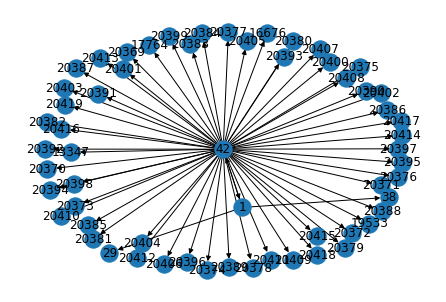

In [42]:
nodes_of_interest = [29, 38, 42]  # provided.

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw,with_labels = True)
plt.show()

### Subgraphs II
In the previous exercise, we gave you a list of nodes whose neighbors we asked you to extract.

Let's try one more exercise in which you extract nodes that have a particular metadata property and their neighbors. This should hark back to what you've learned about using list comprehensions to find nodes. The exercise will also build your capacity to compose functions that you've already written before.

Instructions
100 XP
- Using a list comprehension, extract nodes that have the metadata 'occupation' as 'celebrity' alongside their neighbors:
- The output expression of the list comprehension is n, and there are two iterator variables: n and d. The iterable is the list of nodes of T (including the metadata, which you can specify using data=True) and the conditional expression is if the 'occupation' key of the metadata dictionary d equals 'celebrity'.
- Place them in a new subgraph called T_sub. To do this:
- Iterate over the nodes, compute the neighbors of each node, and add them to the set of nodes nodeset by using the .union() method. This last part has been done for you.
- Use nodeset along with the T.subgraph() method to calculate T_sub.
- Draw T_sub to the screen.

In [43]:
# # Extract the nodes of interest: nodes
# nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# # Create the set of nodes: nodeset
# nodeset = set(nodes)

# # Iterate over nodes
# for n in nodes:

#     # Compute the neighbors of n: nbrs
#     nbrs = T.neighbors(n)

#     # Compute the union of nodeset and nbrs: nodeset
#     nodeset = nodeset.union(nbrs)

# # Compute the subgraph using nodeset: T_sub
# T_sub = T.subgraph(nodeset)

# # Draw T_sub to the screen
# nx.draw(T_sub,with_labels = True)
# plt.show()

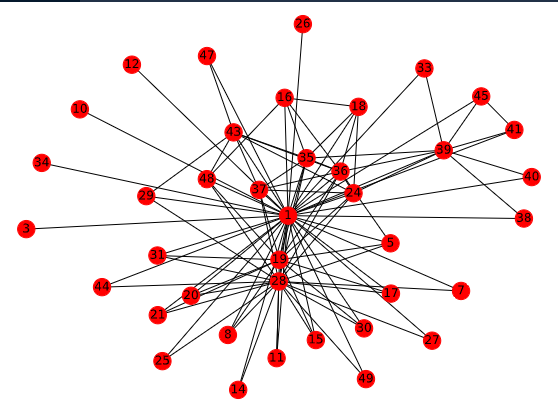

Excellent job! You're now ready to bring together all of the concepts you've learned and apply them to a case study!

# Chapter 4 : Case Study

In [44]:
G = nx.read_gpickle("C:\\Users\\asus\\Downloads\\DataCamp\\Introduction to Network Analysis\\github_users.p")

In [45]:
print("The number of nodes",len(G.nodes()))
print("The numbers of edges",len(G.edges()))

The number of nodes 56519
The numbers of edges 72900


### Characterizing the network (II)
Let's continue recalling what you've learned before about node importances, by plotting the degree distribution of a network. This is the distribution of node degrees computed across all nodes in a network.

Instructions
100 XP
Plot the degree distribution of the GitHub collaboration network G. Recall that there are four steps involved here:
- Calculating the degree centrality of G.
- Using the .values() method of G and converting it into a list.
- Passing the list of degree distributions to plt.hist().
- Displaying the histogram with plt.show().

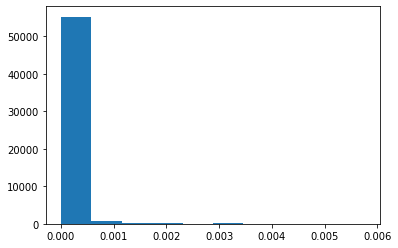

In [46]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

Excellent job! The next step in characterizing the network is to explore its betweenness centrality distribution.

### Characterizing the network (III)
The last exercise was on degree centrality; this time round, let's recall betweenness centrality!

A small note: if executed correctly, this exercise may need about 5 seconds to execute.

Instructions
100 XP
Plot the betweenness centrality distribution of the GitHub collaboration network. You have to follow exactly the same four steps as in the previous exercise, substituting nx.betweenness_centrality() in place of nx.degree_centrality().

In [47]:
# # Import necessary modules
# import matplotlib.pyplot as plt
# import networkx as nx

# ##Plot on subgraph takes a lot of time
# # Plot the degree distribution of the GitHub collaboration network
# # Plot the degree distribution of the GitHub collaboration network
# plt.hist(list(nx.betweenness_centrality(G).values()))
# plt.show()

Fantastic! You'll now move on to visualizing the network using MatrixPlots, ArcPlots, and CircosPlots.

### Connected Component Subgraphs

Definition of a connected component subgraph: a set of nodes connected to one another by some path in the subgraph, and not connected to other nodes in the larger graph

In [48]:
import networkx as nx
G = nx.erdos_renyi_graph(n=100, p=0.03)

In [49]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [50]:
list(connected_component_subgraphs(G))

In [51]:
connected_component_subgraphs(G)

<generator object connected_component_subgraphs at 0x000001BC150AB3C0>

In [52]:
for g in list(connected_component_subgraphs(G)):    
    print(len(g.nodes()))

96
1
1
2


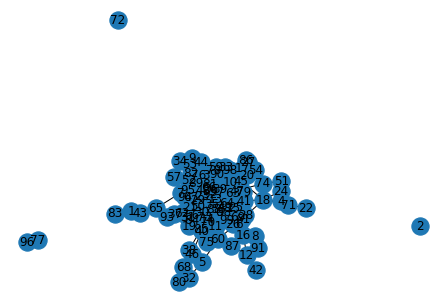

In [53]:
nx.draw(G,with_labels = True)
plt.show()

### MatrixPlot
Let's now practice making some visualizations. The first one will be the MatrixPlot. In a MatrixPlot, the matrix is the representation of the edges.

Instructions
100 XP
- Make a MatrixPlot visualization of the largest connected component subgraph, with authors grouped by their user group number.
- First, calculate the largest connected component subgraph by using the nx.connected_component_subgraphs(G) inside the provided sorted() function. Python's built-in sorted() function takes an iterable and returns a sorted list (in ascending order, by default). Therefore, to access the largest connected component subgraph, the statement is sliced with [-1].
- Create the MatrixPlot object h. You have to specify the parameters graph and node_grouping to be the largest connected component subgraph and 'grouping', respectively.
- Draw the MatrixPlot object to the screen and display the plot.

In [54]:
G = nx.read_gpickle("C:\\Users\\asus\\Downloads\\DataCamp\\Introduction to Network Analysis\\github_users.p")

In [55]:
# # Import necessary modules
# from nxviz import MatrixPlot
# import matplotlib.pyplot as plt

# # Calculate the largest connected component subgraph: largest_ccs
# largest_ccs = sorted(connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# # Create the customized MatrixPlot object: h
# h = MatrixPlot(graph=largest_ccs, node_grouping='grouping')

# # Draw the MatrixPlot to the screen
# h.draw()
# plt.show()

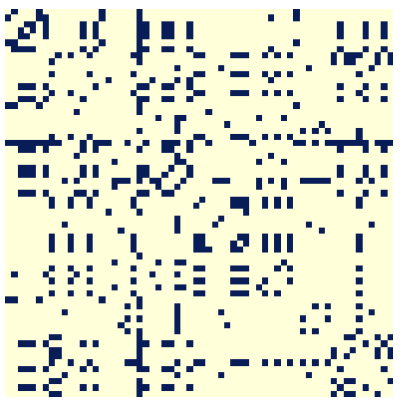

Great work! Recall that in a MatrixPlot, nodes are the rows and columns of the matrix, and cells are filled in according to whether an edge exists between the pairs of nodes.

### ArcPlot
Next up, let's use the ArcPlot to visualize the network. You're going to practice sorting the nodes in the graph as well.

Note: this exercise may take about 4-7 seconds to execute if done correctly.

Instructions
100 XP
- Make an ArcPlot of the GitHub collaboration network, with authors sorted by degree. To do this:
- Iterate over all the nodes in G, including the metadata (by specifying data=True).
- In each iteration of the loop, calculate the degree of each node n with nx.degree() and set its 'degree' attribute. nx.degree() accepts two arguments: A graph and a node.
- Create the ArcPlot object a by specifying two parameters: the graph, which is G, and the node_order, which is 'degree', so that the nodes are sorted.
- Draw the ArcPlot object to the screen.

In [56]:
# # Import necessary modules
# from nxviz.plots import ArcPlot
# import matplotlib.pyplot as plt

# # Iterate over all the nodes in G, including the metadata
# for n, d in G.nodes(data = True):

#     # Calculate the degree of each node: G.node[n]['degree']
#     G.node[n]['degree'] = nx.degree(G, n)

# # Create the ArcPlot object: a
# a = ArcPlot(G,node_order = 'degree')

# # Draw the ArcPlot to the screen
# a.draw()
# plt.show()

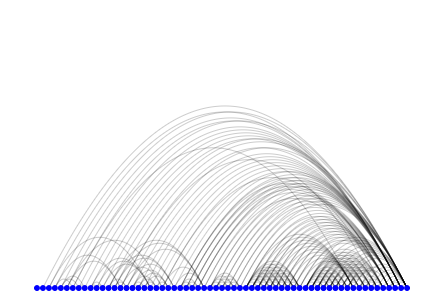

### CircosPlot
Finally, you're going to make a CircosPlot of the network!

Instructions
100 XP
Make a CircosPlot of the network, again, with GitHub users sorted by their degree, and grouped and coloured by their 'grouping' key. To do this:
Iterate over all the nodes in G, including the metadata (by specifying data=True).
In each iteration of the loop, calculate the degree of each node n with nx.degree() and set its 'degree' attribute.
Create the CircosPlot object c by specifying three parameters in addition to the graph G: the node_order, which is 'degree', the node_grouping and the node_color, which are both 'grouping'.
Draw the CircosPlot object to the screen.

In [57]:
print(len(G))
print(type(G.nodes(0)))
print(list(G.edges(data=True))[-1])
print(list(G.edges(data=True))[-1][2])

56519
<class 'networkx.classes.reportviews.NodeDataView'>
('u10898', 'u10901', {})
{}


In [58]:
# # Import necessary modules
# from nxviz import CircosPlot
# import matplotlib.pyplot as plt

# # Iterate over all the nodes, including the metadata
# for n, d in G.nodes(data = True):

#     # Calculate the degree of each node: G.node[n]['degree']
#     G.nodes[n]['degree'] = nx.degree(G, n)

# # Create the CircosPlot object: c
# c = CircosPlot(G,node_order = 'degree')

# # Draw the CircosPlot object to the screen
# c.draw()
# plt.show()

Fantastic! This CircosPlot provides a compact alternative to the ArcPlot. It is easy to see in this plot that most users belong to one group.

### Finding cliques (I)
You're now going to practice finding cliques in G. Recall that cliques are "groups of nodes that are fully connected to one another", while a maximal clique is a clique that cannot be extended by adding another node in the graph.

Instructions
100 XP
Count the number of maximal cliques present in the graph and print it.
Use the nx.find_cliques() function of G to find the maximal cliques.
The nx.find_cliques() function returns a generator object. To count the number of maximal cliques, you need to first convert it to a list with list() and then use the len() function. Place this inside a print() function to print it.

In [59]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

54083


Fantastic! This Github network has 54083 maximal cliques.

### Finding cliques (II)
Great work! Let's continue by finding a particular maximal clique, and then plotting that clique.

Instructions
100 XP
Find the author(s) that are part of the largest maximal clique, and plot the subgraph of that/one of those clique(s) using a CircosPlot. To do this:
Use the nx.find_cliques() function to calculate the maximal cliques in G. Place this within the provided sorted() function to calculate the largest maximal clique.
Create the subgraph consisting of the largest maximal clique using the .subgraph() method and largest_clique.
Create the CircosPlot object using the subgraph G_lc (without any other arguments) and plot it.

In [60]:
# # Import necessary modules
# import networkx as nx
# from nxviz import CircosPlot
# import matplotlib.pyplot as plt

# # Find the author(s) that are part of the largest maximal clique: largest_clique
# largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# # Create the subgraph of the largest_clique: G_lc
# G_lc = G.subgraph(largest_clique)

# # Create the CircosPlot object: c
# c = CircosPlot(G_lc)

# # Draw the CircosPlot to the screen
# c.draw()
# plt.show()

Great work! The subgraph consisting of the largest maximal clique has 14 users. It's time to move on towards building the recommendation system!


### Finding important collaborators
Almost there! You'll now look at important nodes once more. Here, you'll make use of the degree_centrality() and betweenness_centrality() functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.

Instructions
100 XP
Compute the degree centralities of G. Store the result as deg_cent.
Compute the maximum degree centrality. Since deg_cent is a dictionary, you'll have to use the .values() method to get a list of its values before computing the maximum degree centrality with max().
Identify the most prolific collaborators using a list comprehension:
Iterate over the degree centrality dictionary deg_cent that was computed earlier using its .items() method. What condition should be satisfied if you are seeking to find user(s) that have collaborated with the most number of users? Hint: It has do to with the maximum degree centrality.
Hit 'Submit Answer' to see who the most prolific collaborator(s) is/are!

In [61]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u741']


Great work! It looks like 'u741' is the most prolific collaborator.

#### Characterizing editing communities
You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

The largest maximal clique in the Github user collaboration network has been assigned to the subgraph G_lmc. Note that for NetworkX version 2.x and later, G.subgraph(nodelist) returns only an immutable view on the original graph. We must explicitly ask for a .copy() of the graph to obtain a mutatable version.

Instructions
100 XP
Go out 1 degree of separation from the clique, and add those users to the subgraph. Inside the first for loop:
Add nodes to G_lmc from the neighbors of G using the .add_nodes_from() and .neighbors() methods.
Using the .add_edges_from(), method, add edges to G_lmc between the current node and all its neighbors. To do this, you'll have create a list of tuples using the zip() function consisting of the current node and each of its neighbors. The first argument to zip() should be [node]*len(list(G.neighbors(node))), and the second argument should be the neighbors of node.
Record each node's degree centrality score in its node metadata.
Do this by assigning nx.degree_centrality(G_lmc)[n] to G_lmc.node[n]['degree centrality'] in the second for loop.
Visualize this network with an ArcPlot sorting the nodes by degree centrality (you can do this using the keyword argument node_order='degree centrality').

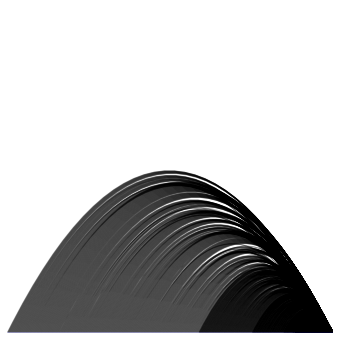

In [63]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.nodes[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

Great work! The final step that remains is to recommend collaborators who have not yet collaborated together.

### Recommending co-editors who have yet to edit together
Finally, you're going to leverage the concept of open triangles to recommend users on GitHub to collaborate!

Instructions
100 XP
Compile a list of GitHub users that should be recommended to collaborate with one another. To do this:
In the first for loop, iterate over all the nodes in G, including the metadata (by specifying data=True).
In the second for loop, iterate over all the possible triangle combinations, which can be identified using the combinations() function with a size of 2.
If n1 and n2 do not have an edge between them, a collaboration between these two nodes (users) should be recommended, so increment the (n1), (n2) value of the recommended dictionary in this case. You can check whether or not n1 and n2 have an edge between them using the .has_edge() method.
Using a list comprehension, identify the top 10 pairs of users that should be recommended to collaborate. The iterable should be the key-value pairs of the recommended dictionary (which can be accessed with the .items() method), while the conditional should be satisfied if count is greater than the top 10 in all_counts. Note that all_counts is sorted in ascending order, so you can access the top 10 with all_counts[-10].

In [64]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('u264', 'u655'), ('u627', 'u3082'), ('u363', 'u1208'), ('u89', 'u325'), ('u741', 'u935'), ('u268', 'u741')]


Fantastic job! You've identified pairs of users who should collaborate together, and in doing so, built your very own recommendation system!